$$ V  = N_V$$
$$W = -2V + 3Y + 5Z + N_W$$
$$X = 2V + N_X$$
$$Y = -X + N_Y$$
$$Z = \alpha X + N_Z$$
$$N_V, N_W, N_X, N_Y, N_Z \sim \mathcal{N}(0,1)$$

In [4]:
# Simulat e200 i.i.d data points, and visualize

import numpy as np
n = 200
alpha = 2
V = np.random.normal(0, 1, size=n)
X = 2* V + np.random.normal(0, 1, size=n)
Y = -1 * X + np.random.normal(0, 1, size=n)
Z = alpha * X + np.random.normal(0, 1, size=n)
W = -2 * V + 3 * Y + 5 * Z + np.random.normal(0, 1, size=n)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


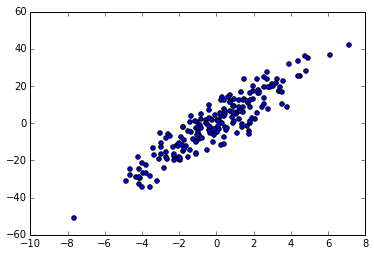

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, W)

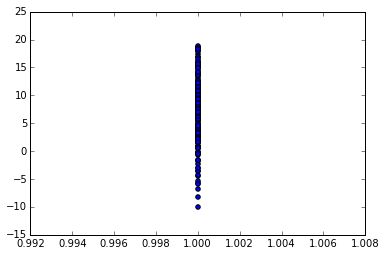

In [6]:
# Now let's intervene on X

V = np.random.normal(0, 1, size=n)
X = np.ones(n)
Y = -1 * X + np.random.normal(0, 1, size=n)
Z = alpha * X + np.random.normal(0, 1, size=n)
W = -2 * V + 3 * Y + 5 * Z + np.random.normal(0, 1, size=n)
plt.scatter(X, W)

# Without intervening, W ranges from -40 to 40. With intervening, it ranges from -12 to 20.

Problem 2.6d
$$ V  = N_V$$
$$W = -2V + 3Y + 5Z + N_W$$
$$X = 2V + N_X$$
$$Y = -X + N_Y$$
$$Z = \alpha X + N_Z$$
$$N_V, N_W, N_X, N_Y, N_Z \sim \mathcal{N}(0,1)$$
$$W = -2V + 3(-X + N_Y) + 5 * \alpha X + 5 N_Z + N_W \\
= -2V + (5 * \alpha -3) X + \text{ some nois terms that arent } \\
$$
If we set $ \alpha = 3/5$, the coefficient of X is 0, so no $N_X$ term is in the final value for W.
By definition, $\mathbb{P}^W = \mathbb{P}^{W | do(X = \tilde{N}_X)}$ for any new distribution $\tilde{N}_X$ we can think of.
Thus there would be no causal effect from W to X despite the directed path.

Problem 2.6e
For a given $\alpha$, find $\frac{\partial}{\partial x} \mathbb{E}[W | do(X=x)$
$$\mathbb{E}[W | do(X=x) \\
= \mathbb{E} -2V + (5 * \alpha -3) X + \text{ some noise terms that are zero-centered normals } \\
= (5 * \alpha - 3)x$$ (knowing X = x and taking expectations.
So, the partial is $ 5 * \alpha - 3.$

Problem 2.6.2
Prove that one can d-separate any two nodes in a DAG G that are not
directly connected by an edge
Take A and B.
If A and B aren't connected, then simply by conditioning on all the nodes on paths connected the two, one can d-seperate A and B.

Use this to prove the remark: If $\mathbb{P}^{\boldsymbol{X}}$ is faithful and Markov w.r.t. $\mathcal{G}$, causal minimality is satisfied.

Markov property:  $A, B$ are d-seperated by C \rightarrow $A \independent B | \boldsymbol{C}$ 
Faithfuleness: $A \independent B | \boldsymbol{C}$ \rightarrow $A, B$ are d-seperated by C.
Causal Minimality: A distribution is Markov w.r.t. \mathcal{G} but not any sub-graph of \mathcal{G}.

Suppose distribution were Markov w.r.t. subgraph of \mathcal{G}.
Case 1: Subgraph is missing a node.
Then the distribution doesn't apply to the subgraph (missing a variable)

Case 2: Subgraph is missing an edge. Let edge connect A \rightarrow B.

Now, we can d-seperate A and B.
This means A and B are conditionally indepenent. (Markov of sub-graph)
That violates the faithfulness propety of the original graph, since A and B aren't d-seperated there. Q.E.D.
